In [5]:
from numpy import *
import matplotlib.pyplot as plt

initail m:0,b:0,error:5565.107834483214
initail m:1.4777440851894448,b:0.08893651993741349,error:112.6148101161347,iteration:1000


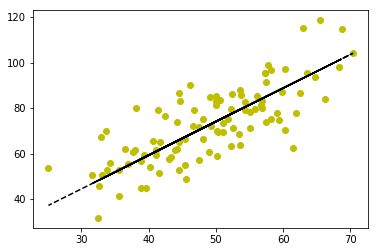

In [6]:
# y = mx + b
# m is slope, b is y-intercept

# calculating mean square error by formula
def error_for_line2(point,m,b):
    error = sum(list(map(lambda x,y:(y-(m*x+b))**2,point[:,0],point[:,1])))
    return error/float(len(point))


# gradient descent formula here check this link
# https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/
def grad_step(b_current,m_current,point,learn):
    b_gradient = 0
    m_gradient = 0
    N = float(len(point))
    # calculating gradient descent for b and m by partial derivative formula 
    b_gradient = sum(list(map(lambda x,y:-(2/N) * (y - ((m_current * x) + b_current)),point[:,0],point[:,1])))
    m_gradient = sum(list(map(lambda x,y:-(2/N) * x * (y - ((m_current * x) + b_current)),point[:,0],point[:,1])))

    new_b = b_current - learn*b_gradient
    new_m = m_current - learn*m_gradient
    return [new_b,new_m]
    
    
def gradient_descent_runner(itera,start_m,start_b,learning,point):
    b = start_m
    m = start_b
    for i in range(itera):
        b,m = grad_step(b,m,array(point),learning)
        
    return[b,m]
        
def run():
    data = genfromtxt("data.csv",delimiter=",")
    intial_m = 0
    intial_b = 0
    learning_rate = .0001
    iteration = 1000
    print("initail m:{0},b:{1},error:{2}".format(intial_m,intial_b,error_for_line2(data,intial_m,intial_b)))
    [b,m] = gradient_descent_runner(iteration,intial_m,intial_b,learning_rate,data) 
    print("initail m:{0},b:{1},error:{2},iteration:{3}".format(m,b,error_for_line2(data,m,b),iteration))
    x = array(data[:,0]).reshape(-1,1)
    y = array(data[:,1]).reshape(-1,1)
    plt.plot(x, y, 'yo', x,m*x+b, '--k')
if __name__ == '__main__':
    run()

In [7]:
# Easy understandable code
#The optimal values of m and b can be actually calculated with way less effort than doing a linear regression. 
#this is just to demonstrate gradient descent

from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        
    return [b, m]

def run():
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
 
if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


In [8]:
# reading more about linear regression check out this pages
# https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/
# https://www.bmc.com/blogs/scikit-learn/
# https://medium.com/datadriveninvestor/bias-and-variance-in-machine-learning-51fdd38d1f86

In [9]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [10]:
model = LinearRegression()
data = pd.read_csv("data.csv",names=["learn_hour","score"])

In [12]:
x = array(data["learn_hour"]).reshape(-1,1)
y = array(data["score"]).reshape(-1,1)
model.fit(x,y)
y

array([[ 31.70700585],
       [ 68.77759598],
       [ 62.5623823 ],
       [ 71.54663223],
       [ 87.23092513],
       [ 78.21151827],
       [ 79.64197305],
       [ 59.17148932],
       [ 75.3312423 ],
       [ 71.30087989],
       [ 55.16567715],
       [ 82.47884676],
       [ 62.00892325],
       [ 75.39287043],
       [ 81.43619216],
       [ 60.72360244],
       [ 82.89250373],
       [ 97.37989686],
       [ 48.84715332],
       [ 56.87721319],
       [ 83.87856466],
       [118.5912173 ],
       [ 57.25181946],
       [ 51.39174408],
       [ 75.38065167],
       [ 74.76556403],
       [ 95.45505292],
       [ 95.22936602],
       [ 79.05240617],
       [ 83.43207142],
       [ 63.35879032],
       [ 41.4128853 ],
       [ 76.61734128],
       [ 96.76956643],
       [ 74.08413012],
       [ 66.58814441],
       [ 77.76848242],
       [ 50.71958891],
       [ 62.12457082],
       [ 60.81024665],
       [ 52.68298337],
       [ 58.56982472],
       [ 82.90598149],
       [ 61

In [13]:
print(model.coef_)

[[1.32243102]]


In [14]:
print(model.intercept_)

[7.99102098]


In [15]:
import matplotlib.pyplot as plt
prediction = model.predict(x)
prediction

array([[ 50.97313068],
       [ 78.64428408],
       [ 89.36067528],
       [ 70.77427966],
       [ 87.08986264],
       [ 80.9127616 ],
       [ 77.03752068],
       [ 59.96198716],
       [ 71.60662047],
       [ 77.48479033],
       [ 68.05548117],
       [ 79.86730909],
       [ 66.39493013],
       [ 84.9148112 ],
       [ 83.00884075],
       [ 72.73180677],
       [ 67.0867556 ],
       [ 87.7300766 ],
       [ 68.31853072],
       [ 59.3235847 ],
       [ 95.52248785],
       [ 94.4992372 ],
       [ 70.78164424],
       [ 62.97194057],
       [ 76.55270453],
       [ 86.50483786],
       [ 83.77954744],
       [ 92.11821271],
       [ 69.79829882],
       [ 74.84884901],
       [ 77.05365354],
       [ 55.02702285],
       [ 64.11033459],
       [ 84.90961325],
       [ 84.03668646],
       [ 68.0829885 ],
       [ 89.84450605],
       [ 51.75533073],
       [ 56.17513031],
       [ 57.81447577],
       [ 66.91273975],
       [ 65.27646179],
       [ 74.20930217],
       [ 66

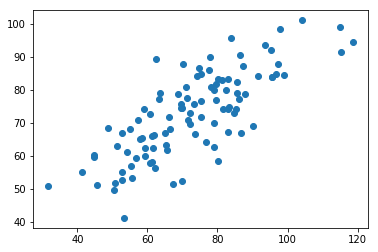

In [16]:
plt.scatter(y,prediction)

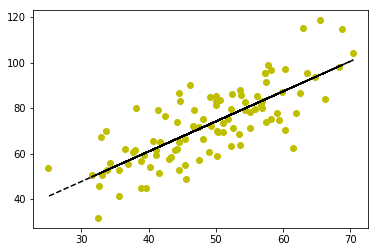

In [17]:
plt.plot(x, y, 'yo', x,prediction, '--k') 

In [18]:
print(model.predict(44))

ValueError: Expected 2D array, got scalar array instead:
array=44.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [19]:
y = 1.32243102*44 + 7.99102098
y

66.17798585999999

In [22]:
dt = pd.read_csv("data.csv",names=["h_s","score"])
dt


,h_s,score
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
5,55.142188,78.211518
6,52.211797,79.641973
7,39.299567,59.171489
8,48.105042,75.331242
9,52.550014,71.300880
